In [1]:
import pandas as pd
import matplotlib.pyplot as plt

d = {"x": [-1, -1, 0, 1, 3], "y": [1, 1, 3, 4, 5]}

df = pd.DataFrame(data=d)
df

,x,y
0,-1,1
1,-1,1
2,0,3
3,1,4
4,3,5


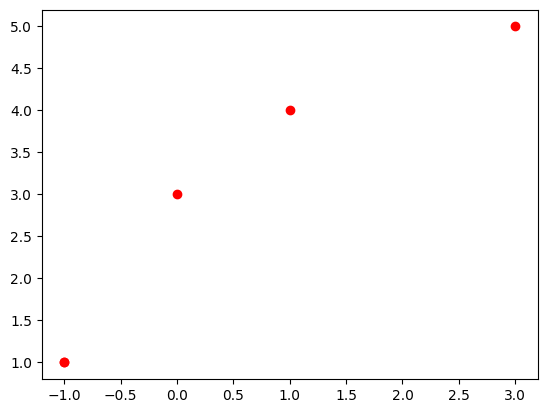

In [2]:
plt.plot(df["x"], df["y"], "ro")

<Figure size 640x480 with 0 Axes>

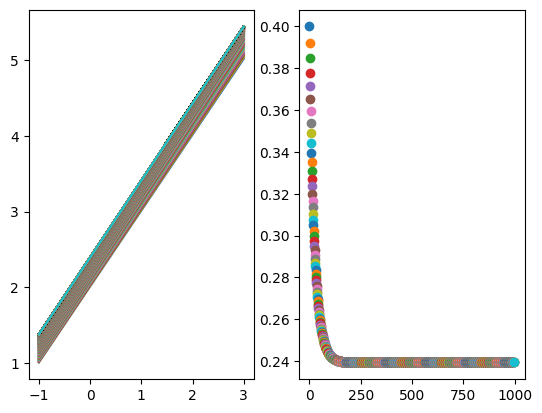

0.23928571428571424
1.0178571442699589
2.392857137537094


In [3]:
lr = 0.01

def GradientDescent(X, y, lr, n):
    fig = plt.figure()
    fig, ax = plt.subplots(nrows= 1, ncols=2)
    a = 1
    b = 2
    p = len(X)
    for l in range(n):
        mse = 0
        pochodneA = 0
        pochodneB = 0
        for i in range(p):
            mse += (y[i] - (a * X[i] + b))**2
            pochodneA += -X[i] * (y[i] - (a * X[i] + b))
            pochodneB += -(y[i] - (a * X[i] + b))
        mse = mse / p
        pochodneA = 2 * pochodneA / p
        pochodneB = 2 * pochodneB / p
        a = a - (lr * pochodneA)
        b = b - (lr * pochodneB)
        ax[0].plot(X, a * X + b)
        ax[1].scatter(l, mse)
    plt.show()
    print(mse)
    print(a)
    print(b)
       
GradientDescent(df["x"], df["y"], lr, 1000)

<Figure size 640x480 with 0 Axes>

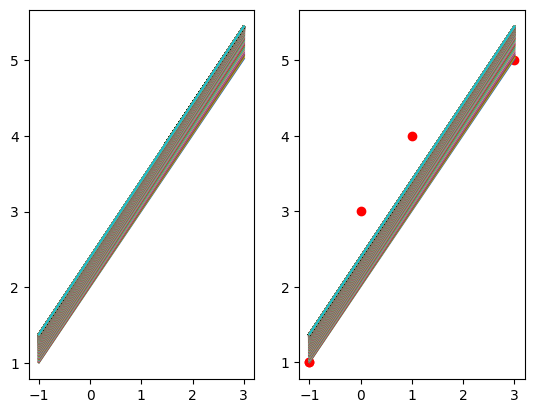

0.2392857142857142
1.0178571442699589
2.392857137537094


In [4]:
import numpy as np

def GradientDescentNumpy(X, y, lr, n):
    fig = plt.figure()
    fig, ax = plt.subplots(nrows= 1, ncols=2)
    a = 1
    b = 2
    p = len(X)
    plt.plot(df["x"], df["y"], "ro")
    for l in range(n):
        mse = np.sum((y - (a * X + b))**2 / p)
        pochodneA = np.sum(2 * -X * (y - (a * X + b)) / p)
        pochodneB = np.sum(2 * -(y - (a * X + b)) / p)
        a = a - (lr * pochodneA)
        b = b - (lr * pochodneB)
        ax[0].plot(X, a * X + b)
        ax[1].plot(X, a * X + b)
    plt.show()
    print(mse)
    print(a)
    print(b)

GradientDescentNumpy(df["x"], df["y"], lr, 1000) 

In [5]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
newDF = boston[['NOX', 'DIS']]
newDF

c:\Users\broni\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,NOX,DIS
0,0.538,4.0900
1,0.469,4.9671
2,0.469,4.9671
3,0.458,6.0622
4,0.458,6.0622
...,...,...
501,0.573,2.4786
502,0.573,2.2875
503,0.573,2.1675
504,0.573,2.3889


<Figure size 640x480 with 0 Axes>

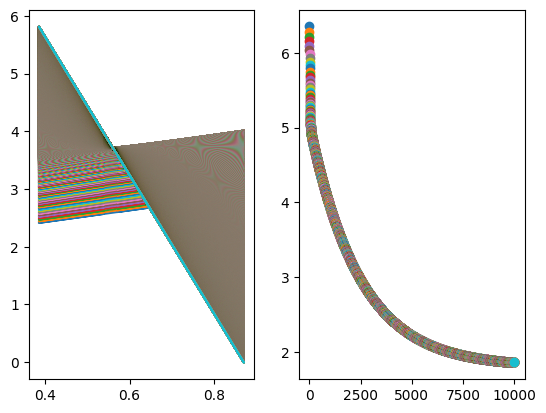

1.8606265741240489
-11.9763780556107
10.426810730212216


In [21]:
GradientDescent(newDF["NOX"], newDF["DIS"], lr, 10000)

In [19]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(newDF[["NOX"]], newDF["DIS"])
predLR = clf.predict(newDF[["NOX"]])

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(newDF["DIS"], predLR)

1.8067642652540064